# Projeto Final - Machine Learning
- Luca Melão
- Matheus Kwon

----

## Imports necessários

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns   

## Importando o Dataset

In [3]:
filepath = 'data/'
filename = 'Airbnb_Open_Data.csv'

if filename in  os.listdir(filepath):
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo na pasta "./data" ?')

Encontrei o arquivo Airbnb_Open_Data.csv, tudo certo para prosseguir!


In [4]:
# Lendo o arquivo
db_original = pd.read_csv(filepath + filename)

# Trabalharemos em uma cópia do dataset
db = db_original.copy()

/var/folders/18/8l06zz3s5_bdw3brnw4jt_bc0000gn/T/ipykernel_99068/4094873204.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  db_original = pd.read_csv(filepath + filename)


----

## Informações Gerais

In [11]:
size = db.shape
linhas = size[0]
colunas = size[1]
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 102599
Colunas: 26


In [ ]:
display(db.head())

----

# Tratamento dos dados

## Conversão dos dtypes
Algumas das features, e também o nosso target, estão no formato object, devemos então realizar a conversão para float, string ou demais dtypes.

In [6]:
# Convert price
db['price'] = db['price'].astype(str).apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

# Convert service fee
db['service fee'] = db['service fee'].astype(str).apply(lambda x: x.replace('nan', '0').replace('$', '')).astype('int')

# Convert country
db['country'] = db['country'].astype(str)

# Convert NAME
db['NAME'] = db['NAME'].astype(str)

# Convert country code
db['country code'] = db['country code'].astype(str)

# Convert host_identity_verified
db['host_identity_verified'] = db.host_identity_verified.map(dict(verified=1, unconfirmed=0))

# Convert host name
db['host name'] = db['host name'].astype(str)

# Convert neighbourhood group
db['neighbourhood group'] = db['neighbourhood group'].astype(str)

# Convert neighbourhood 
db['neighbourhood'] = db['neighbourhood'].astype(str)

# Convert instant bookable
db['instant_bookable'] = pd.to_numeric(db['instant_bookable'], errors='coerce')

# Convert cancelation policy
db['cancellation_policy'] = db['cancellation_policy'].astype(str)

# Convert room type
db['room type'] = db['room type'].astype(str)

# Convert the date from the last review
db['last review'] = db['last review'].astype(str)


In [8]:
# Validando a conversão definindo o nosso target
target = db['price']
target.describe()

count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

## Eliminando duplicatas

In [ ]:
db.drop_duplicates(keep='first', inplace=True)

## Lidando com valores NaN

Com os dados no formato desejado, podemos começar a tratá-los.

In [12]:
# Quantos nulos tenho em cada coluna?
dadosnulls = db.isnull().sum()
dadosnulls[dadosnulls.values > 0]

host_identity_verified               289
lat                                    8
long                                   8
instant_bookable                     105
Construction year                    214
price                                247
minimum nights                       409
number of reviews                    183
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64

In [13]:
# Percentualmente
display(round((dadosnulls[dadosnulls.values>0]/linhas)*100, 2).sort_values(ascending=0))

license                           100.00
house_rules                        50.81
reviews per month                  15.48
availability 365                    0.44
minimum nights                      0.40
review rate number                  0.32
calculated host listings count      0.31
host_identity_verified              0.28
price                               0.24
Construction year                   0.21
number of reviews                   0.18
instant_bookable                    0.10
lat                                 0.01
long                                0.01
dtype: float64

In [14]:
# Eliminando as colunas com mais de 50% dos valores nulos, ou colunas que não agregam valor para a análise
#db.drop(['license', 'house_rules', 'id', 'host id'], axis = 1, inplace=True)

# sera que nao ter house rules aumenta a atratividade??
db.drop(['license', 'id'], axis = 1, inplace=True)

In [16]:
# Lista de colunas

total_features_list = db.columns.tolist()
print(total_features_list)

['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules']


In [ ]:
# Nas colunas quantitativas devemos preencher os nan com as medianas
quant_features = []

for feature in quant_features:
    db[feature].fillna(value = db[feature].median(), inplace = True)

# Nas colunas qualitativas devemos preencher caso a caso

db.fillna({'reviews_per_month':0}, inplace=True)



----

## Análise Exploratória

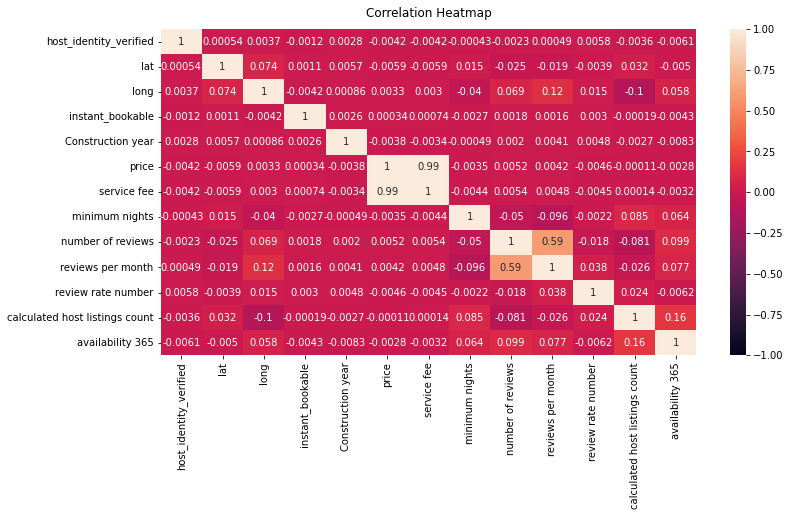

In [17]:
plt.figure(figsize=(12, 6))

heatmap = sns.heatmap(db.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

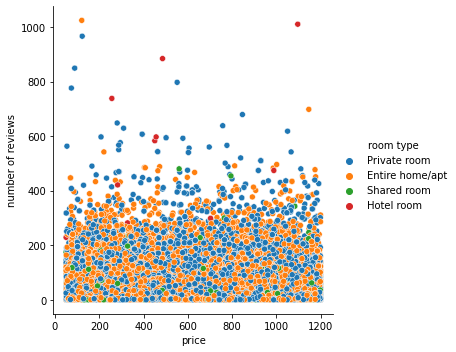

In [19]:
sns.relplot(data=db, kind='scatter', x='price', y='number of reviews', hue='room type');

## Análise de palavra chave nos anúncios 

There are 3948901 words in the combination of all cells in column NAME.


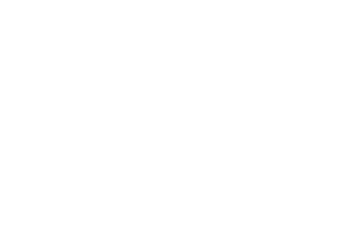

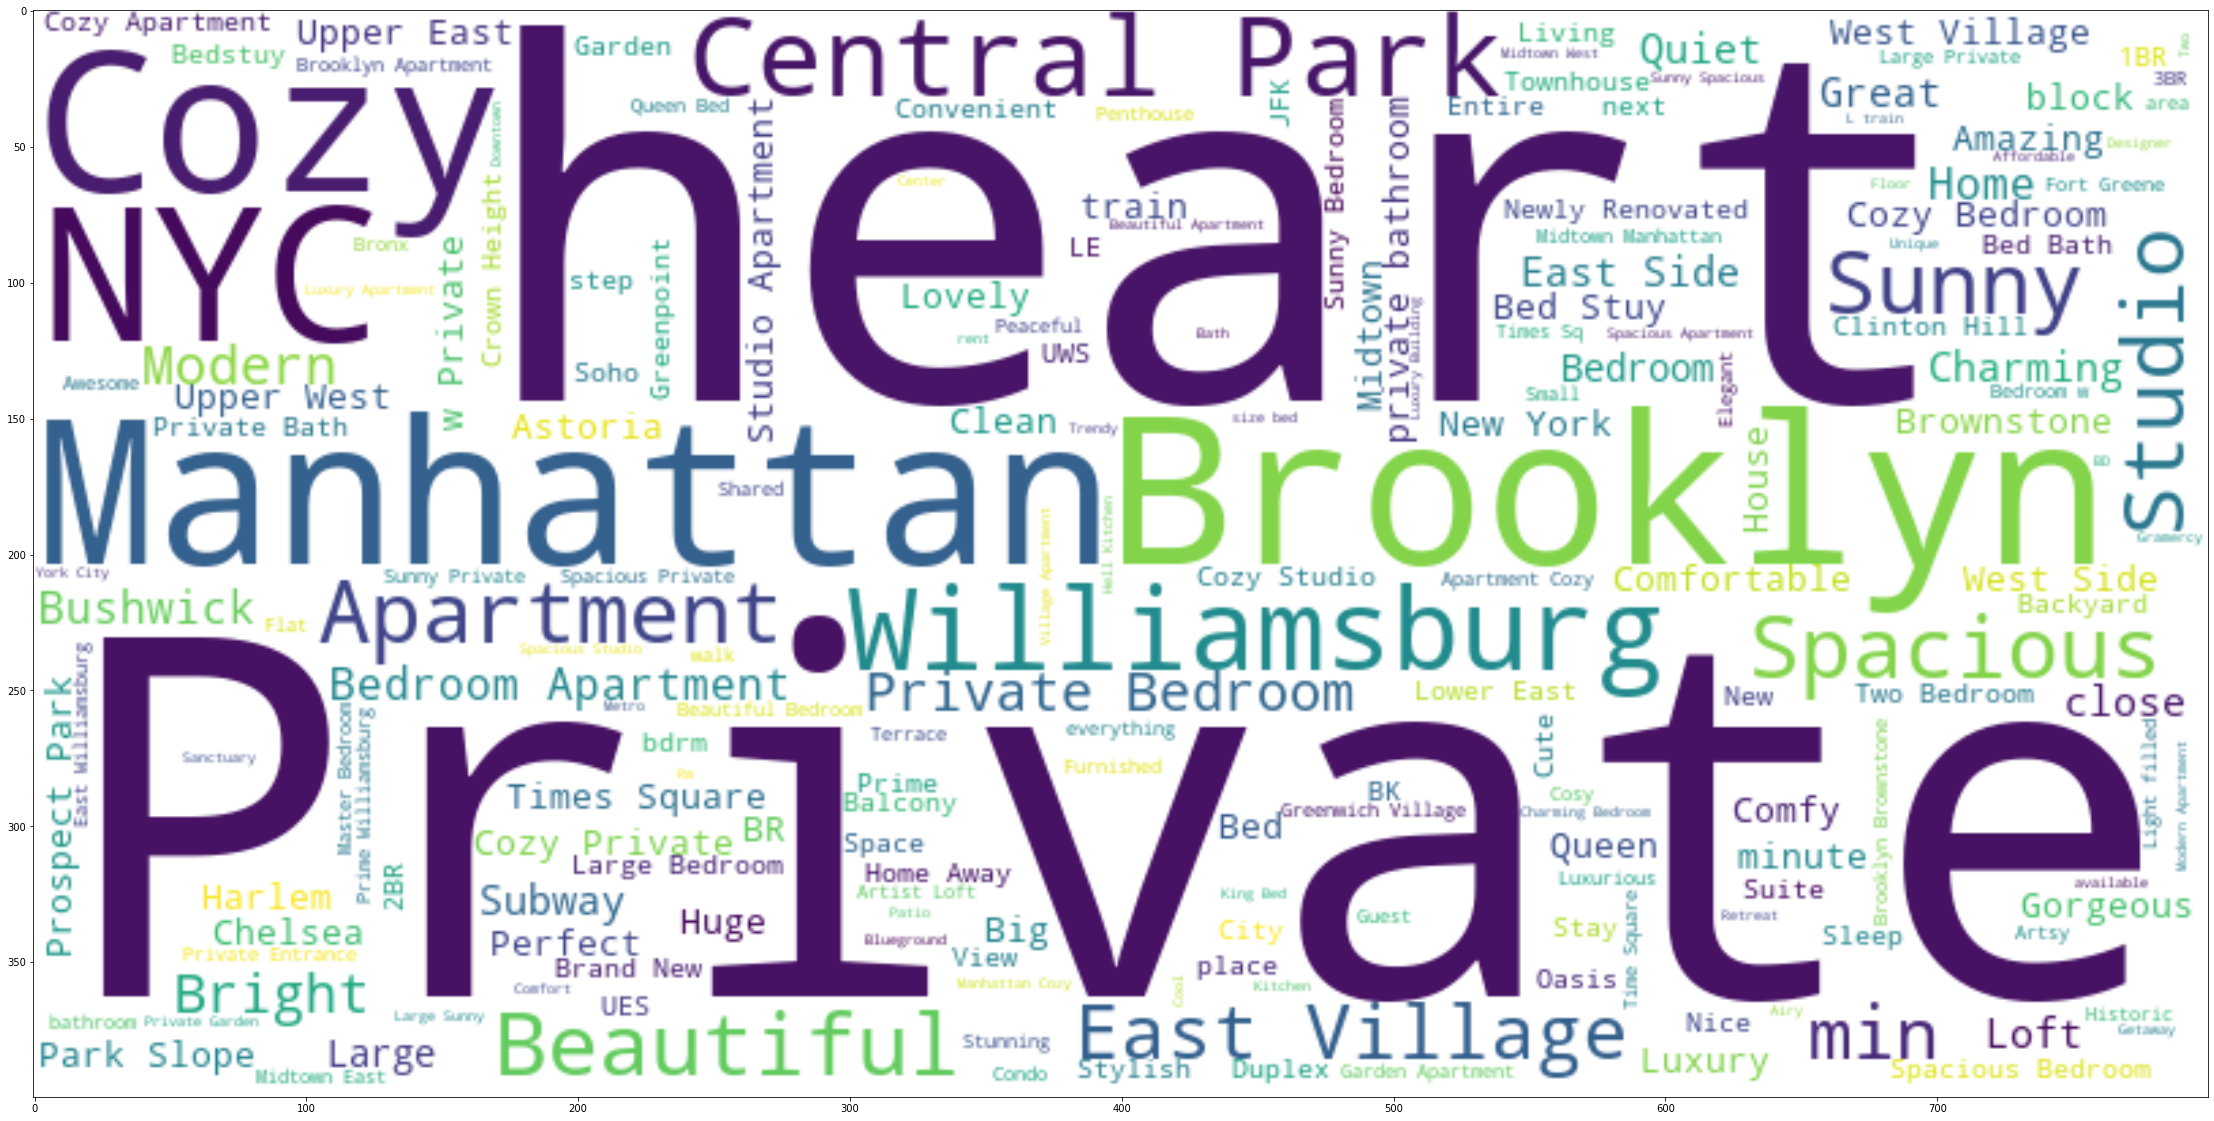

In [22]:
# Extraído de:
# https://www.kaggle.com/code/bhargavichintalapati/airbnb-data-cleaning-visualization#6.-Word-Cloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#get the words to perform the the words cloud
text = " ".join(review for review in db.NAME.astype(str))
print ("There are {} words in the combination of all cells in column NAME.".format(len(text)))

#set the stop words by default which you will not include
stopwords = set(STOPWORDS)


#Add custom word exlusions
stopwords.update(["guidelines", "implemented", "access", "Average", "near","room", 'one', "Location", "Best",'Apt', 'stop', 'Full', 'NY','Gem', 'Chic'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off");
plt.figure(figsize=(40,20));
plt.tight_layout(pad=0);
plt.imshow(wordcloud, interpolation='bilinear');
plt.show();

# Ideias de análise

- 1. Explorar o impacto da service fee (percentualmente) na preferencia ou precificacao dos anuncios.
- 2. Estudo por regiao, localizacao X bairros marginalizados X preco
- 3. Análise do modo como o nome do anúncio é feito
- 4. Pelo 'host id' podemos ver quais proprietarios possuem mais listings no airbnb e como fazem uso disso ao seu favor.